In [1]:
%matplotlib inline

# Yellowbrick Examples 

Ths notebook is a sample of the examples that yellowbrick provides.

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import numpy as np 
import pandas as pd
import yellowbrick as yb 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rcParams["figure.figsize"] = (9,6)

## Anscombe's Quartet 

Yellowbrick has learned Anscombe's lesson - which is why we believe that visual diagnostics are vital to machine learning.

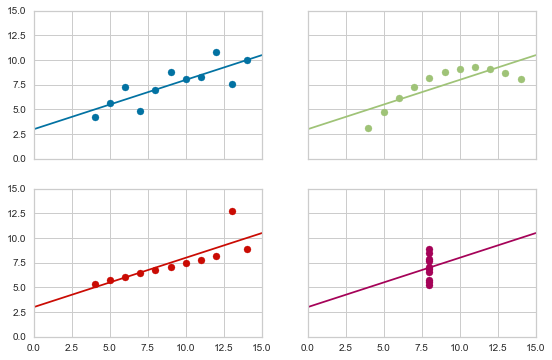

In [3]:
g = yb.anscombe()

## Load Datasets for Example Code

Yellowbrick has provided several datasets wrangled from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) to present the following examples. If you haven't downloaded the data, you can do so by running:

```
$ python download.py
```

In the same directory as the example notebook. Note that this will create a directory called `data` that contains subdirectories with the given data. 

In [4]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
        
    
    # Return the data frame
    return pd.read_csv(path)

## Feature Analysis 

Feature analysis visualizers are designed to visualize instances in data space in order to detect features or targets that might impact downstream fitting. Because ML operates on high-dimensional data sets (usually at least 35), the visualizers focus on aggregation, optimization, and other techniques to give overviews of the data. It is our intent that the steering process will allow the data scientist to zoom and filter and explore the relationships between their instances and between dimensions.

At the moment we have three feature analysis visualizers implemented:

- Rank2D: rank pairs of features to detect covariance 
- RadViz: plot data points along axes ordered around a circle to detect separability 
- Parallel Coordinates: plot instances as lines along vertical axes to detect clusters 

Feature analysis visualizers implement the `Transformer` API from Scikit-Learn, meaning they can be used as intermediate transform steps in a `Pipeline` (particularly a `VisualPipeline`). They are instantiated in the same way, and then fit and transform are called on them, which draws the instances correctly. Finally `poof` or `show` is called which displays the image.  

In [5]:
# Feature Analysis Imports 
# NOTE that all these are available for import from the `yellowbrick.features` module 
from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

### Rank Features 

Rank1D and Rank2D evaluate single features or pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1] allowing them to be ranked. A similar concept to SPLOMs, the scores are visualized on a lower-left triangle heatmap so that patterns between pairs of features can be easily discerned for downstream analysis. 

In [6]:
# Load the classification data set
data = load_data('credit') 

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

#### Rank 1D

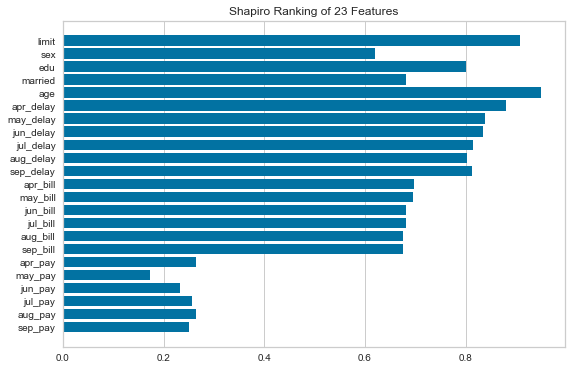

In [7]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

#### Rank2D

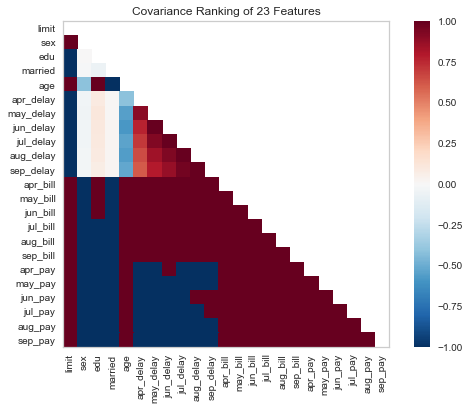

In [8]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

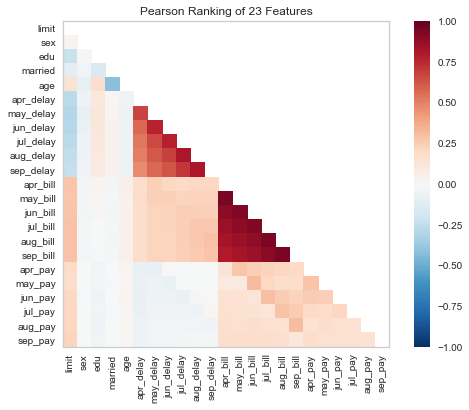

In [9]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

### RadViz 

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformely around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This meachanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization. 

Data scientists use this method to dect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?

In [10]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

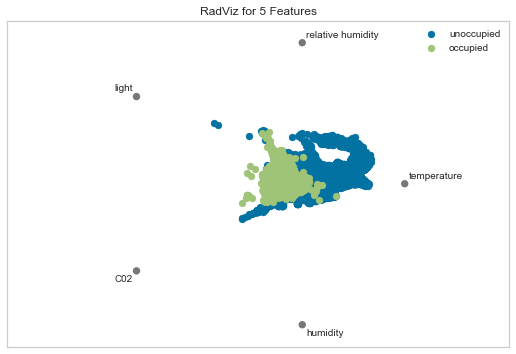

In [11]:
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

For regression, the RadViz visualizer should use a color sequence to display the target information, as opposed to discrete colors.

### Parallel Coordinates 

Parallel coordinates displays each feature as a vertical axis spaced evenly along the horizontal, and each instance as a line drawn between each individual axis. This allows many dimensions; in fact given infinite horizontal space (e.g. a scrollbar) an infinite number of dimensions can be displayed! 

Data scientists use this method to detect clusters of instances that have similar classes, and to note features that have high varaince or different distributions. 

In [12]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

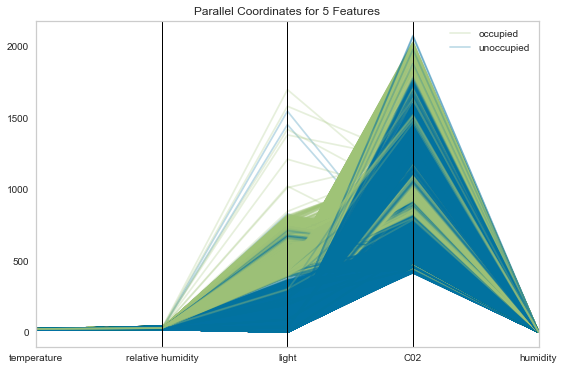

In [13]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

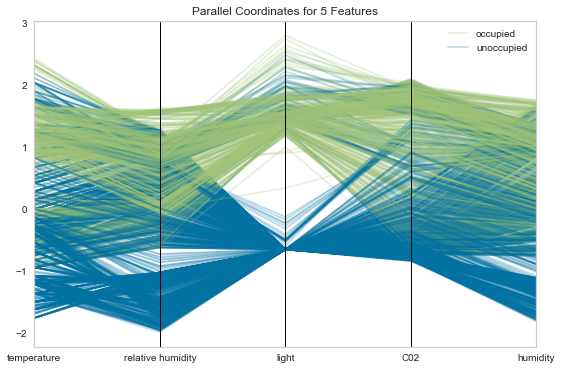

In [14]:
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1,
)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

### Data Visualization 

The `ScatterVisualizer` and `JointPlotVisualizer` display data for one or two dimensions. 

#### Scatter Visualization

In [15]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features]
y = data.occupancy

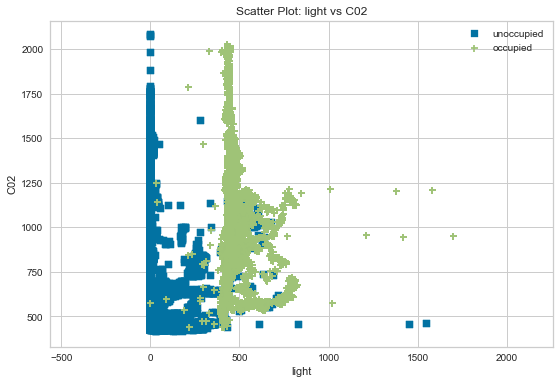

In [16]:
visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

#### Joint Plot

In [17]:
# Load the data
df = load_data('concrete')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature]
y = df[target]

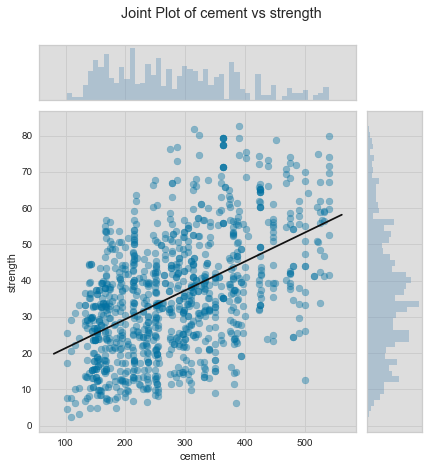

In [18]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

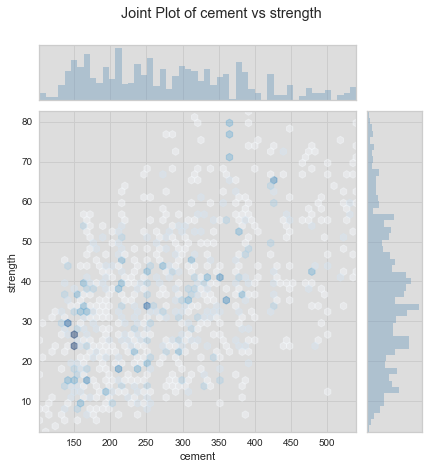

In [19]:
visualizer = JointPlotVisualizer(feature=feature, target=target, joint_plot='hex')

visualizer.fit(X, y)
visualizer.poof()

### Projection 

In [20]:
# Load the classification data set
data = load_data('credit') 

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

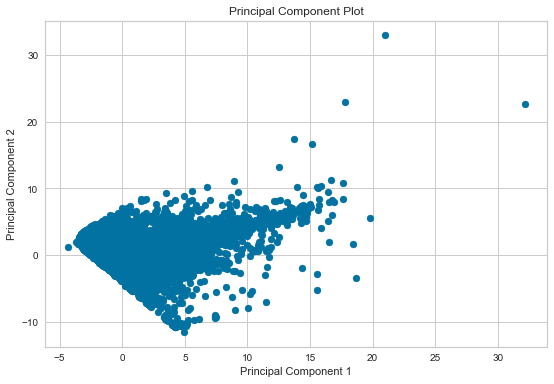

In [21]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

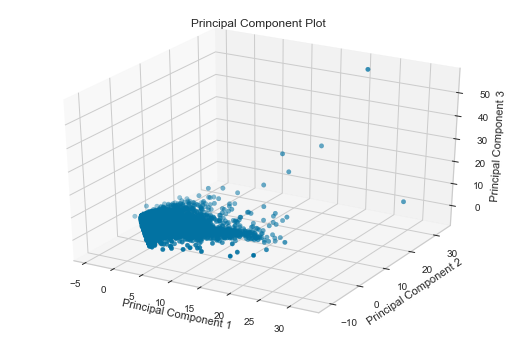

In [22]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

## Regressor Evaluation 

Regression models attempt to predict a target in a continuous space. Regressor score visualizers display the instances in model space to better understand how the model is making predictions. We currently have implemented two regressor evaluations:

- Residuals Plot: plot the difference between the expected and actual values 
- Prediction Error: plot expected vs. the actual values in model space 

Estimator score visualizers _wrap_ Scikit-Learn estimators and expose the Estimator API such that they have `fit()`, `predict()`, and `score()` methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a `Pipeline` or `VisualPipeline`.

In [23]:
# Regression Evaluation Imports 

from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot

### Residuals Plot 

A residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

In [24]:
# Load the data
df = load_data('concrete')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

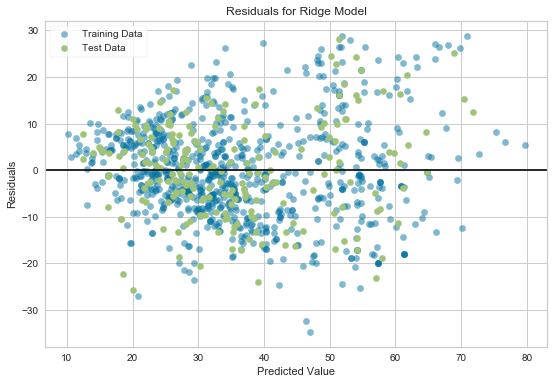

In [25]:
# Instantiate the linear model and visualizer 
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Prediction Error Plot 

Plots the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists diagnose this plot by comparing against the 45 degree line, where the prediction exactly matches the model. 

In [26]:
# Load the data
df = load_data('concrete')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

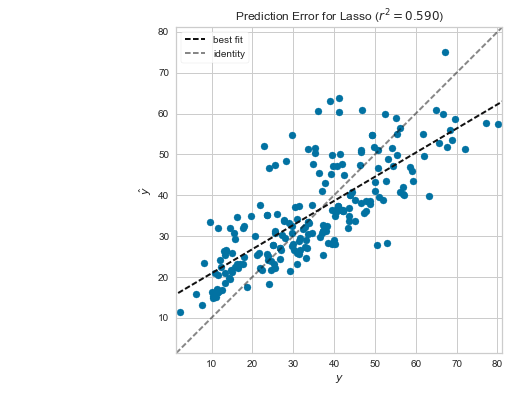

In [27]:
# Instantiate the linear model and visualizer 
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Regularization Alpha Selection 

Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). Alphas that are too high on the other hand increase the error due to bias (underfit). It is important, therefore to choose an optimal Alpha such that the error is minimized in both directions.

The AlphaSelection Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. Generally speaking, alpha increases the affect of regularization, e.g. if alpha is zero there is no regularization and the higher the alpha, the more the regularization parameter influences the final model.

In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import ManualAlphaSelection

In [29]:
# Load the data
df = load_data('concrete')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

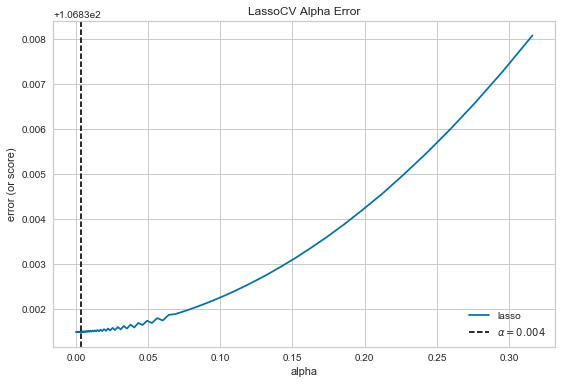

In [30]:
# Create a list of alphas to cross-validate against 
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer 
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

In [31]:
# # Create a list of alphas to cross-validate against 
# alphas = np.logspace(-12, -0.5, 400)

# # Instantiate the linear model and visualizer 
# model = make_pipeline(
#     PolynomialFeatures(2),
#     Ridge()
# )
# visualizer = ManualAlphaSelection(RidgeCV(), alphas=alphas,)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# g = visualizer.poof()             # Draw/show/poof the data

## Classifier Evaluation 

Classification models attempt to predict a target in a discrete space, that is assign an instance of dependent variables one or more categories. Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations. We currently have implemented three classifier evaluations:

- ClassificationReport: Presents the confusion matrix of the classifier as a heatmap 
- ROCAUC: Presents the graph of receiver operating characteristics along with area under the curve
- ClassBalance:  Displays the difference between the class balances and support 

Estimator score visualizers wrap Scikit-Learn estimators and expose the Estimator API such that they have fit(), predict(), and score() methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a Pipeline or VisualPipeline.

In [32]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix, DecisionBoundariesVisualizer

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Classification Report 

The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection. 

In [33]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

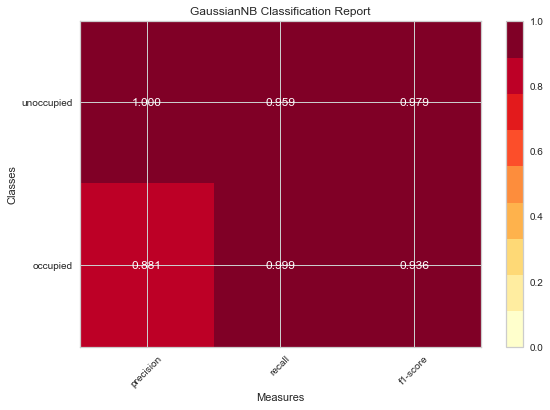

In [34]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Confusion Matrix

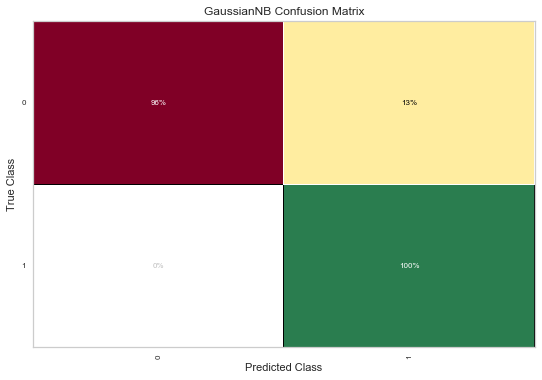

In [35]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ConfusionMatrix(bayes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### ROCAUC 

Plot the ROC to visualize the tradeoff between the classifier's sensitivity and specificity.

In [36]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

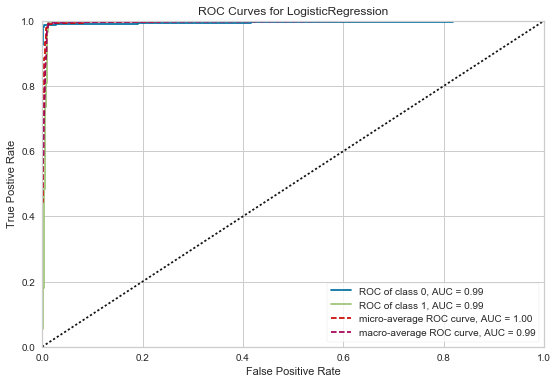

In [37]:
# Instantiate the classification model and visualizer 
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### ClassBalance 

Class balance chart that shows the support for each class in the fitted classification model.

In [38]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

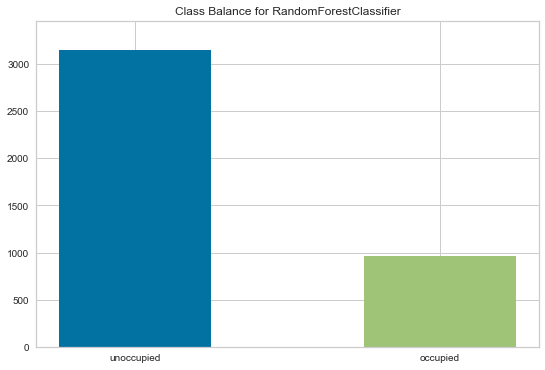

In [39]:
# Instantiate the classification model and visualizer 
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Decision Boundaries 

In [40]:
# # Instantiate the classification model and visualizer 
# forest = RandomForestClassifier()
# visualizer = DecisionBoundariesVisualizer(forest, features=[1,3], classes=classes)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)
# g = visualizer.poof()             # Draw/show/poof the data

## Clustering Evaluation 

Clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. There are two primary classes of clustering algorithm: _agglomerative_ clustering links similar data points together, whereas _centroidal_ clustering attempts to find centers or partitions in the data. Yellowbrick provides the `yellowbrick.cluster` module to visualize and evaluate clustering behavior. Currently we provide two visualizers to evaluate _centroidal_ mechanisms, particularly K-Means clustering, that help us to discover an optimal $K$ parameter in the clustering metric:

- Elbow Visualizer: visualize the clusters according to some scoring function, look for an "elbow" in the curve. 
- Silhouette Visualizer: visualize the silhouette scores of each cluster in a single model. 

Because it is very difficult to `score` a clustering model, Yellowbrick visualizers wrap Scikit-Learn "clusterer" estimators via their `fit()` method. Once the clustering model is trained, then the visualizer can call `poof()` to display the clustering evaluation metric.

In [41]:
# Clustering Evaluation Imports 
from functools import partial

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs as sk_make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [42]:
# Helpers for easy dataset creation 
N_SAMPLES = 1000 
N_FEATURES = 12 
SHUFFLE = True 

# Make blobs partial 
make_blobs = partial(sk_make_blobs, n_samples=N_SAMPLES, n_features=N_FEATURES, shuffle=SHUFFLE)

### Silhouette Visualizer 

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering. 

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for $K$ by comparing multiple visualizers. 

In [43]:
# Make 8 blobs dataset 
X, y = make_blobs(centers=8)

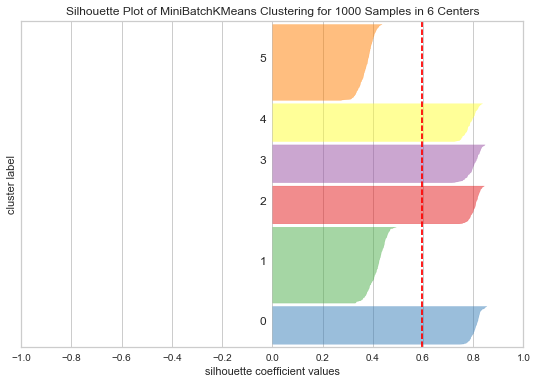

In [44]:
# Instantiate the clustering model and visualizer 
model = MiniBatchKMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

### Elbow Method 

The elbow method for $K$ selection visualizes multiple clustering models with different values for $K$. Model selection is based on whether or not there is an "elbow" in the curve; e.g. if the curve looks like an arm, if there is a clear change in angle from one part of the curve to another. 

In [45]:
# Make 8 blobs dataset 
X, y = make_blobs(centers=8)

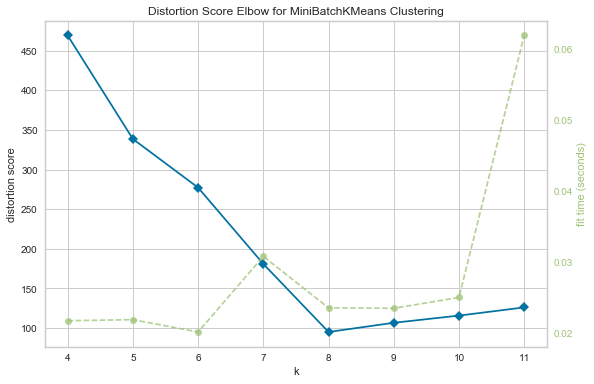

In [46]:
# Instantiate the clustering model and visualizer 
visualizer = KElbowVisualizer(MiniBatchKMeans(), k=(4,12))

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

## Text Analysis 

Yellowbrick provides the `yellowbrick.text` module for text-specific visualizers. The `TextVisualizer` class specifically deals with datasets that are corpora and not simple numeric arrays or DataFrames, providing utilities for analyzing word distribution, showing document similarity, or simply wrapping some of the other standard visualizers with text-specific display properties. 

### Loading a Text Corpus 

As in the previous sections, Yellowbrick has provided a sample dataset to run the following cells. In particular, we are going to use a text corpus wrangled from the [Baleen RSS Corpus](http://baleen.districtdatalabs.com/) to present the following examples. If you haven't already downloaded the data, you can do so by running:

```
$ python download.py
```

In the same directory as the examples notebook. Note that this will create a directory called `data` that contains subdirectories with the provided datasets.

**NOTE**: If you've already done this from above, you do not have to do it again. 

In [47]:
from download import download_all 
from sklearn.datasets.base import Bunch

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Corpus loading mechanisms
corpora = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}


def load_corpus(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    
    Note: This function is slightly different to the `load_data` function 
    used above to load pandas dataframes into memory. 
    """
    
    # Get the path from the datasets 
    path = corpora[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Read the directories in the directory as the categories. 
    categories = [
        cat for cat in os.listdir(path) 
        if os.path.isdir(os.path.join(path, cat))
    ]
    
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)
            
            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())
        
    
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

### t-SNE: Corpus Visualization 

One very popular method for visualizing document similarity is to use t-distributed stochastic neighbor embedding, t-SNE. Scikit-Learn implements this decomposition method as the `sklearn.manifold.TSNE` transformer. By decomposing high-dimensional document vectors into 2 dimensions using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE is able to effectively cluster similar documents. By decomposing to 2 or 3 dimensions, the documents can be visualized with a scatter plot. 

Unfortunately, `TSNE` is very expensive, so typically a simpler decomposition method such as SVD or PCA is applied ahead of time. The `TSNEVisualizer` creates an inner transformer pipeline that applies such a decomposition first (SVD with 50 components by default), then performs the t-SNE embedding. The visualizer then plots the scatter plot, coloring by cluster or by class, or neither if a structural analysis is required. 

In [48]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
# Load the data and create document vectors 
corpus = load_corpus('hobbies')
tfidf  = TfidfVectorizer()

docs   = tfidf.fit_transform(corpus.data)
labels = corpus.target 

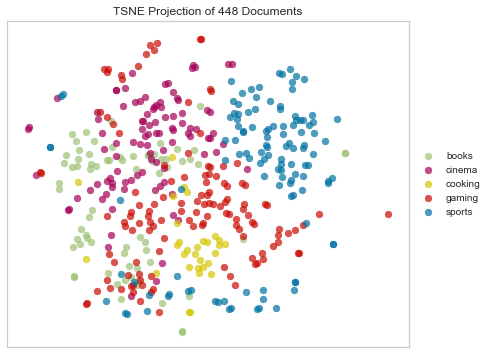

In [50]:
# Create the visualizer and draw the vectors 
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

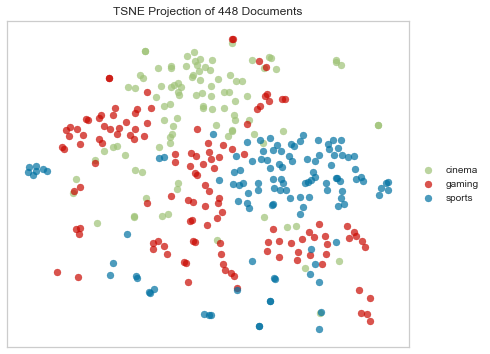

In [51]:
# Only visualize the sports, cinema, and gaming classes 
tsne = TSNEVisualizer(classes=['sports', 'cinema', 'gaming'])
tsne.fit(docs, labels)
tsne.poof()

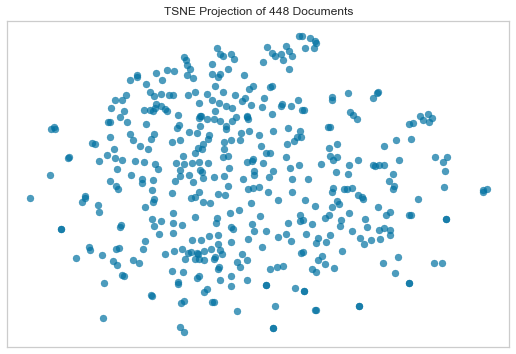

In [52]:
# Don't color points with their classes 
tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

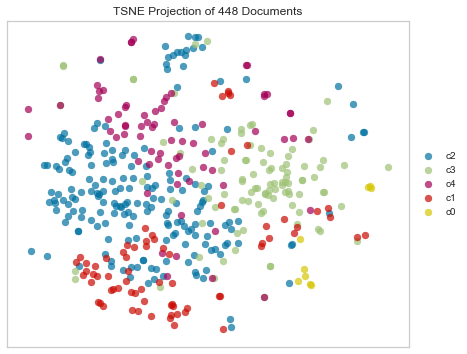

In [53]:
# Apply clustering instead of class names. 
from sklearn.cluster import KMeans 

clusters = KMeans(n_clusters=5)
clusters.fit(docs)

tsne = TSNEVisualizer() 
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

### Frequency Distribution Visualization 

A method for visualizing the frequency of tokens within and across corpora is frequency distribution. A frequency distribution tells us the frequency of each vocabulary item in the text. In general, it could count any kind of observable event. It is a distribution because it tells us how the total number of word tokens in the text are distributed across the vocabulary items.

In [54]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer

Note that the `FreqDistVisualizer` does not perform any normalization or vectorization, and it expects text that has already be count vectorized.

We first instantiate a `FreqDistVisualizer` object, and then call `fit()` on that object with the count vectorized documents and the features (i.e. the words from the corpus), which computes the frequency distribution. The visualizer then plots a bar chart of the top 50 most frequent terms in the corpus, with the terms listed along the x-axis and frequency counts depicted at y-axis values. As with other Yellowbrick visualizers, when the user invokes `poof()`, the finalized visualization is shown.

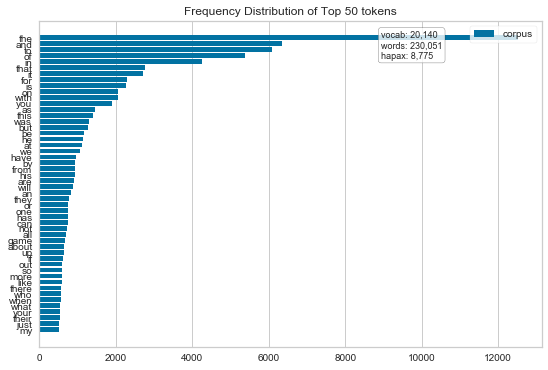

In [55]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#### Visualizing Stopwords Removal

For example, it is interesting to compare the results of the `FreqDistVisualizer` before and after stopwords have been removed from the corpus:

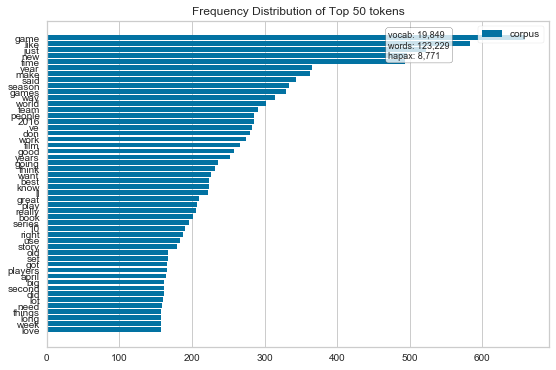

In [56]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#### Visualizing tokens across corpora

It is also interesting to explore the differences in tokens across a corpus. The hobbies corpus that comes with Yellowbrick has already been categorized (try `corpus['categories']`), so let's visually compare the differences in the frequency distributions for two of the categories: _"cooking"_ and _"gaming"_

In [57]:
hobby_types = {}

for category in corpus['categories']:
    texts = []
    for idx in range(len(corpus['data'])):
        if corpus['target'][idx] == category:
            texts.append(corpus['data'][idx])
    hobby_types[category] = texts

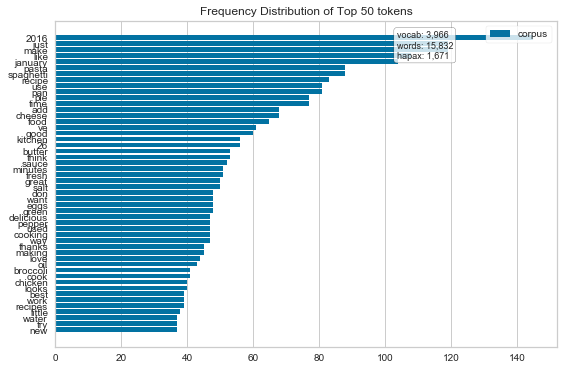

In [58]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in hobby_types['cooking'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

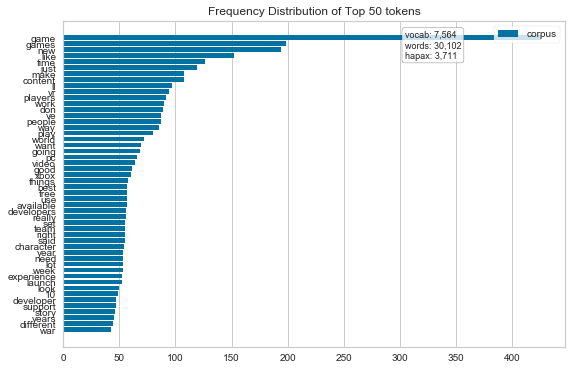

In [59]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text for text in hobby_types['gaming'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()